In [118]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')
import re

In [119]:
df_seoul = pd.read_csv('data/서울공원분석.csv')
df_seoul

,Unnamed: 0,공원명,지역,면적,경도,위도,분류,크기
0,0,남산도시자연공원,중구,2896887.0,126.990377,37.550140,대형,15.0
1,1,길동생태공원,강동구,80683.0,127.154779,37.540394,소형,3.0
2,2,서울대공원,과천시,9132690.0,127.019846,37.426449,대형,15.0
3,3,서울숲,성동구,480994.0,127.041798,37.543072,중형,7.0
4,4,월드컵공원,마포구,2284085.0,126.878907,37.571805,대형,15.0
...,...,...,...,...,...,...,...,...
119,125,숭인근린공원,종로구,45615.0,127.017827,37.576442,소형,3.0
120,126,서일대뒷산공원,중랑구,631021.0,127.098782,37.587716,중형,7.0
121,127,용마도시자연공원(사가정공원),중랑구,109635.0,127.095997,37.579762,중형,7.0
122,128,문화비축기지,마포구,140022.0,126.893246,37.571718,중형,7.0


In [120]:
#df = df_seoul.pivot_table(index=['지역'], values='면적', aggfunc=['sum','count'],)

df = df_seoul.groupby('지역')['면적'].agg(['sum', 'count'])
df
df.drop('과천시', axis=0, inplace=True)


In [121]:
df_gu = pd.read_table('data/서울시구별통계.txt')

In [122]:
df

,sum,count
지역,,
강남구,3626398.50,7
강동구,1526389.30,7
강북구,3714902.40,4
강서구,2194154.10,9
관악구,10431453.08,2
광진구,584002.00,2
구로구,1617657.00,3
금천구,42568.00,3
노원구,12024307.30,2


In [123]:
df.sort_values('지역',inplace=True)

In [124]:
df_gu.sort_values('지역',inplace=True) #과천시 들어가 있다
df_gu
#df_gu.set_index='지역'

df_gu.set_index('지역', inplace=True)

df_gu


,기간,인구,면적,인구밀도(명/㎢)
지역,,,,
강남구,2020,"544,055",39.50,"13,773"
강동구,2020,"463,998",24.59,"18,869"
강북구,2020,"311,569",23.60,"13,202"
강서구,2020,"585,901",41.44,"14,140"
관악구,2020,"509,803",29.57,"17,241"
광진구,2020,"360,109",17.06,"21,105"
구로구,2020,"432,488",20.12,"21,496"
금천구,2020,"247,835",13.02,"19,035"
노원구,2020,"527,032",35.44,"14,872"


In [125]:
#df = df.join(seoul_df[['인구','면적']])     # df = pd.merge(df, seoul_df[['인구','면적']])
df =pd.merge(df, df_gu, how='left',on='지역')


In [126]:
rp_p=[]
#df['인구'] = df.인구.apply(lambda x: int(x.replace(',','')))
for df_g in df.인구:
    rp_p.append(float(df_g.replace(',','')))

len(rp_p)


25

In [127]:
df['인구수정'] = rp_p

In [128]:
df

,sum,count,기간,인구,면적,인구밀도(명/㎢),인구수정
지역,,,,,,,
강남구,3626398.50,7,2020,"544,055",39.50,"13,773",544055.0
강동구,1526389.30,7,2020,"463,998",24.59,"18,869",463998.0
강북구,3714902.40,4,2020,"311,569",23.60,"13,202",311569.0
강서구,2194154.10,9,2020,"585,901",41.44,"14,140",585901.0
관악구,10431453.08,2,2020,"509,803",29.57,"17,241",509803.0
광진구,584002.00,2,2020,"360,109",17.06,"21,105",360109.0
구로구,1617657.00,3,2020,"432,488",20.12,"21,496",432488.0
금천구,42568.00,3,2020,"247,835",13.02,"19,035",247835.0
노원구,12024307.30,2,2020,"527,032",35.44,"14,872",527032.0


In [129]:
'''
df['면적비율'] = df.공원면적 / df.면적 * 100
df['인당면적'] = df.공원면적 / df.인구
'''

"\ndf['면적비율'] = df.공원면적 / df.면적 * 100\ndf['인당면적'] = df.공원면적 / df.인구\n"

In [132]:
#인당 공원 면적
df['인당공원면적'] = df['sum'] / df.인구수정
df['면적비율'] = df['sum'] / df.면적 * 100

KeyError: "None of ['지역'] are in the columns"

In [131]:
x = df.지역
y = df.면적
plt.barh(x,y)
plt.show()

AttributeError: 'DataFrame' object has no attribute '지역'

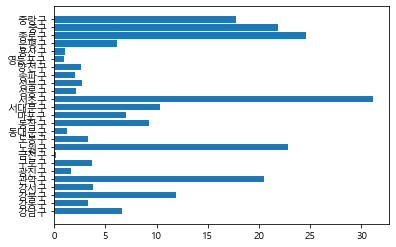

In [ ]:
x = df.지역
y = df['인당공원면적']
plt.barh(x,y)
plt.show()